Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

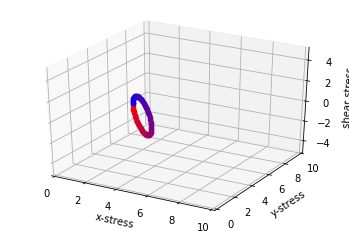

In [7]:
%matplotlib notebook
from numpy import cos, arccos, sin, arctan, tan, pi, sqrt; from numpy import array as ary; import numpy as np; tau = 2*pi
import matplotlib.pyplot as plt; import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
from quat import *
def RotateSigma(stressTensor,theta):
    R = Rot2D(theta)
    #(R)(sigma)(R^T)
    return np.matmul(R,np.matmul(stressTensor,R.T))


sigmaxx = 2
sigmayy = 5
shear_orig=0
numPoints=100

sigma = np.zeros([2,2])
sigma[0][0] = sigmaxx
sigma[1][1] = sigmayy
sigma[0][1] = shear_orig
sigma[1][0] = shear_orig

xStressList,yStressList,shearList = [],[],[]

fig = plt.figure()
ax = fig.gca(projection='3d')
Color = np.transpose(    #Make the color vary
    ary([np.linspace(1,0,numPoints), #Starts off as red
    np.linspace(0,0,numPoints),
    np.linspace(0,1,numPoints),    #ends up as blue
    np.linspace(0.8,0.8,numPoints)])
    )
for theta in np.linspace(0,pi,numPoints):
    [[xStress,shear1],[shear2,yStress]] = RotateSigma(sigma, theta)
    if (shear1-shear2)>1e-14: print( FloatingPointError("sigmaxy = ",shear1," is not equal to shearyx = ",shear2))
        #print, but do not raise error, because we don't want it to be 
    xStressList.append(xStress)
    yStressList.append(yStress)
    shearList.append(shear1)
    ax.scatter(xStress,yStress,shear1,    c=[Color[int(numPoints*theta/pi -1)]])
#ax.plot(xStressList,yStressList,shearList)
ax.set_xlim([0,10])
ax.set_xlabel("x-stress")
ax.set_ylim([0,10])
ax.set_ylabel("y-stress")
ax.set_zlim([-5,5])
ax.set_zlabel("shear stress")
# ax.set_aspect(1)
plt.show()